## Telecom Customer-Churn Case Study

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [141]:
telecomData = pd.read_csv("telecom_churn_data.csv")

In [142]:
telecomData.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [143]:
telecomData.shape

(99999, 226)

### Filter High Value Customers

##### Check Total Recharge Amount for Month 6 and 7 (Since these are good months)

In [144]:
# Recharge amount for calling is available, and there are no null values.
telecomData[['total_rech_amt_6','total_rech_amt_7']].isna().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [145]:
# Calculate Recharge amount for Data from month 6 and 7.
telecomData['total_rech_amt_data_6'] = telecomData['av_rech_amt_data_6'] * telecomData['total_rech_data_6']
telecomData['total_rech_amt_data_7'] = telecomData['av_rech_amt_data_7'] * telecomData['total_rech_data_7']

In [146]:
# We will calculate Total Recharge for other 8th month also since that will remove the need of 2 columns.
telecomData['total_rech_amt_data_8'] = telecomData['av_rech_amt_data_8'] * telecomData['total_rech_data_8']

In [147]:
# Check null values in new derived columns.
telecomData[['total_rech_amt_data_6','total_rech_amt_data_7']].isna().sum()

total_rech_amt_data_6    74846
total_rech_amt_data_7    74428
dtype: int64

In [148]:
telecomData['avg_total_rech_amnt_6and7'] = (telecomData['total_rech_amt_6'] + telecomData['total_rech_amt_7'] +
                                          telecomData['total_rech_amt_data_6'].fillna(0) + 
                                          telecomData['total_rech_amt_data_7'].fillna(0))/2

In [149]:
# 70th Percentile of total recharge amount for 6 and 7 months.
percentile_70_value = telecomData['avg_total_rech_amnt_6and7'].quantile(0.7)
print(percentile_70_value)

478.0


In [150]:
#Retain High value customers and drop rows where 
telecomData_filtered = telecomData[telecomData['avg_total_rech_amnt_6and7'] >= percentile_70_value]

In [151]:
telecomData_filtered.shape

(30001, 230)

##### Filtered data contains 30 K rows approximately

In [152]:
# Tagging the churners in the filtered dataframe
# Columns to be used total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9

def customer_churned (ic, og, two_g, three_g):
    if not(ic or og or two_g or three_g):
        return 1
    else:
        return 0

In [153]:
telecomData_filtered['churn'] = telecomData_filtered.apply(lambda x: customer_churned(x['total_ic_mou_9'],x['total_og_mou_9'],x['vol_2g_mb_9'],x['vol_3g_mb_9']), axis =1)

In [154]:
telecomData_filtered['churn'].value_counts()/len(telecomData_filtered) * 100

0    91.863605
1     8.136395
Name: churn, dtype: float64

##### About 8.1% of the high valued customers have churned

## Data Cleaning

In [155]:
# Rename columns
telecomData_filtered.rename(columns={'aug_vbc_3g':'vbc_3g_8', 'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

In [156]:
# Drop rows related to month 9
telecomData_filtered = telecomData_filtered.drop(telecomData_filtered.filter(like = '_9').columns, axis=1)

In [157]:
# Drop individual columns used to create Avg Data Recharge Amount.
telecomData_filtered = telecomData_filtered.drop(columns = ['av_rech_amt_data_6','av_rech_amt_data_7'
                                                        ,'av_rech_amt_data_8','total_rech_data_6',
                                                           'total_rech_data_7','total_rech_data_8'], axis=1)

In [158]:
telecomData_filtered.shape

(30001, 170)

In [159]:
round(telecomData_filtered.isnull().sum()/len(telecomData_filtered.index)*100).sort_values(ascending=False).head(30)

date_of_last_rech_data_8    47.0
total_rech_amt_data_8       47.0
count_rech_2g_8             47.0
max_rech_data_8             47.0
count_rech_3g_8             47.0
arpu_2g_8                   47.0
fb_user_8                   47.0
arpu_3g_8                   47.0
night_pck_user_8            47.0
date_of_last_rech_data_6    44.0
count_rech_2g_6             44.0
night_pck_user_6            44.0
arpu_2g_6                   44.0
arpu_3g_6                   44.0
count_rech_3g_6             44.0
fb_user_6                   44.0
max_rech_data_6             44.0
total_rech_amt_data_6       44.0
date_of_last_rech_data_7    43.0
arpu_3g_7                   43.0
arpu_2g_7                   43.0
max_rech_data_7             43.0
count_rech_3g_7             43.0
night_pck_user_7            43.0
count_rech_2g_7             43.0
total_rech_amt_data_7       43.0
fb_user_7                   43.0
loc_ic_t2t_mou_8             4.0
std_ic_t2t_mou_8             4.0
std_ic_t2o_mou_8             4.0
dtype: flo

In [160]:
# Remove Columns where more than 40% values are null
telecomData_filtered = telecomData_filtered[telecomData_filtered.columns[(telecomData_filtered.isnull().sum()/len(telecomData_filtered.index) < 0.4)]]

In [161]:
telecomData_filtered.shape

(30001, 143)

In [162]:
# check columns where only 1 unique value is there since they dont contribute much to prediction.
telecomData_filtered.nunique().sort_values().head(20)

circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
last_date_of_month_6     1
last_date_of_month_7     1
last_date_of_month_8     1
std_ic_t2o_mou_6         1
std_og_t2c_mou_8         1
std_ic_t2o_mou_8         1
std_ic_t2o_mou_7         1
std_og_t2c_mou_7         1
std_og_t2c_mou_6         1
churn                    2
monthly_2g_6             5
monthly_2g_8             6
monthly_2g_7             6
monthly_3g_8            12
monthly_3g_6            12
monthly_3g_7            15
dtype: int64

In [163]:
# Drop cols where unique value count is one.
telecomData_filtered = telecomData_filtered.drop(['circle_id',
'loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_7',
'std_og_t2c_mou_6',
'std_ic_t2o_mou_8'
], axis=1)

In [164]:
telecomData_filtered.shape

(30001, 130)

##### Now lets create single column for Good phase(Average of 6 and 7).


In [165]:
# Find list of all columns which contains month 6 and 7
tel_col_list = telecomData_filtered.columns.tolist()
cols_6 = [col for col in tel_col_list if '_6' in col]

In [166]:
telecomData_filtered[cols_6].head(2)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,vbc_3g_6,avg_total_rech_amnt_6and7
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,6/21/2014,252,30.13,83.57,0,0,1,0,101.20,559.0
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.3,49.89,6.66,60.86,0.0,4.5,0.0,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06,15.74,5,1580,1580,6/27/2014,0,0.00,0.00,0,0,0,0,18.74,1185.0


In [167]:
# We dont need to process 'avg_total_rech_amnt_6_7' column, so lets remove it.
cols_6.remove('avg_total_rech_amnt_6and7')
cols_6.remove('date_of_last_rech_6')

In [168]:
# Col list with '_7'
cols_7 = [col.replace('_6','_7') for col in cols_6]

In [169]:
# We have same cols with _7 as well. So lets remove '_6' from name and add values for both 6 and 7 and thn average.
cols_name = [col.replace('_6','') for col in cols_6]

In [170]:
for col in cols_name:
    telecomData_filtered['avg_{}_6and7'.format(col)] =  (telecomData_filtered['{}_6'.format(col)] + telecomData_filtered['{}_7'.format(col)])/2

In [171]:
telecomData_filtered.shape

(30001, 171)

In [172]:
# Lets drop individual colums used to calculate _6and7
telecomData_filtered = telecomData_filtered.drop(cols_6,axis=1)
telecomData_filtered = telecomData_filtered.drop(cols_7,axis=1)

In [173]:
telecomData_filtered.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,avg_total_rech_amnt_6and7,churn,avg_arpu_6and7,avg_onnet_mou_6and7,avg_offnet_mou_6and7,avg_roam_ic_mou_6and7,avg_roam_og_mou_6and7,avg_loc_og_t2t_mou_6and7,avg_loc_og_t2m_mou_6and7,avg_loc_og_t2f_mou_6and7,avg_loc_og_t2c_mou_6and7,avg_loc_og_mou_6and7,avg_std_og_t2t_mou_6and7,avg_std_og_t2m_mou_6and7,avg_std_og_t2f_mou_6and7,avg_std_og_mou_6and7,avg_isd_og_mou_6and7,avg_spl_og_mou_6and7,avg_og_others_6and7,avg_total_og_mou_6and7,avg_loc_ic_t2t_mou_6and7,avg_loc_ic_t2m_mou_6and7,avg_loc_ic_t2f_mou_6and7,avg_loc_ic_mou_6and7,avg_std_ic_t2t_mou_6and7,avg_std_ic_t2m_mou_6and7,avg_std_ic_t2f_mou_6and7,avg_std_ic_mou_6and7,avg_total_ic_mou_6and7,avg_spl_ic_mou_6and7,avg_isd_ic_mou_6and7,avg_ic_others_6and7,avg_total_rech_num_6and7,avg_total_rech_amt_6and7,avg_max_rech_amt_6and7,avg_last_day_rch_amt_6and7,avg_vol_2g_mb_6and7,avg_vol_3g_mb_6and7,avg_monthly_2g_6and7,avg_sachet_2g_6and7,avg_monthly_3g_6and7,avg_sachet_3g_6and7,avg_vbc_3g_6and7
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,6/21/2014,7/16/2014,8/8/2014,252,5.75,109.61,0,0,1,0,968,30.40,559.0,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,3.5,307.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,6/27/2014,7/25/2014,8/26/2014,779,0.00,0.00,0,0,0,0,802,57.74,1185.0,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,6/25/2014,7/31/2014,8/30/2014,10,0.03,11.94,0,3,0,0,315,21.03,696.0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,6/30/2014,7/31/2014,8/31/2014,50,0.00,0.00,0,0,0,0,720,0.00,640.0,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,6/18/2014,7/7/2014,8/24/2014,0,0.01,1009.92,0,0,1,1,604,40.45,583.0,0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0

In [174]:
telecomData_filtered.shape

(30001, 89)

In [175]:
telecomData_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 89 columns):
mobile_number                 30001 non-null int64
arpu_8                        30001 non-null float64
onnet_mou_8                   28827 non-null float64
offnet_mou_8                  28827 non-null float64
roam_ic_mou_8                 28827 non-null float64
roam_og_mou_8                 28827 non-null float64
loc_og_t2t_mou_8              28827 non-null float64
loc_og_t2m_mou_8              28827 non-null float64
loc_og_t2f_mou_8              28827 non-null float64
loc_og_t2c_mou_8              28827 non-null float64
loc_og_mou_8                  28827 non-null float64
std_og_t2t_mou_8              28827 non-null float64
std_og_t2m_mou_8              28827 non-null float64
std_og_t2f_mou_8              28827 non-null float64
std_og_mou_8                  28827 non-null float64
isd_og_mou_8                  28827 non-null float64
spl_og_mou_8                  28827 non-null 

##### Convert columns to correct format

In [176]:
dateCols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

In [177]:
telecomData_filtered[dateCols] = telecomData_filtered[dateCols].apply(pd.to_datetime, errors='coerce')

In [178]:
telecomData_filtered[dateCols].isna().sum()

date_of_last_rech_6     73
date_of_last_rech_7     98
date_of_last_rech_8    583
dtype: int64

In [179]:
# Remove rows where column 'date_of_last_rech_6' is NaT
telecomData_filtered = telecomData_filtered[~np.isnat(telecomData_filtered['date_of_last_rech_6'])]

In [180]:
telecomData_filtered[dateCols].isna().sum()

date_of_last_rech_6      0
date_of_last_rech_7     98
date_of_last_rech_8    576
dtype: int64

##### Impute Previous month data where date value is NaT

In [181]:
telecomData_filtered.date_of_last_rech_7 = np.where(telecomData_filtered.date_of_last_rech_7.notnull(),
                      telecomData_filtered.date_of_last_rech_7,
                      telecomData_filtered.date_of_last_rech_6)

telecomData_filtered.date_of_last_rech_8 = np.where(telecomData_filtered.date_of_last_rech_8.notnull(),
                      telecomData_filtered.date_of_last_rech_8,
                      telecomData_filtered.date_of_last_rech_7)

In [182]:
telecomData_filtered[dateCols].isna().sum()

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
dtype: int64

In [183]:
# Calculate difference between these consecutive days
telecomData_filtered['last_rech_7-6'] = (telecomData_filtered.date_of_last_rech_7 - 
                                         telecomData_filtered.date_of_last_rech_6)
telecomData_filtered['last_rech_8-7'] = (telecomData_filtered.date_of_last_rech_8 - 
                                         telecomData_filtered.date_of_last_rech_7)

telecomData_filtered['last_rech_7-6'] = telecomData_filtered['last_rech_7-6'].astype(str).str.split(' ', n=1, expand=True)
telecomData_filtered['last_rech_8-7'] = telecomData_filtered['last_rech_8-7'].astype(str).str.split(' ', n=1, expand=True)

In [184]:
# Change data type to Integer
telecomData_filtered['last_rech_7-6'] = telecomData_filtered['last_rech_7-6'].astype(int)
telecomData_filtered['last_rech_8-7'] = telecomData_filtered['last_rech_8-7'].astype(int)

In [185]:
# Drop Date columns since derived columns are calculated from them.
telecomData_filtered = telecomData_filtered.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)

In [186]:
# Change "Age on Network" to from 'Days' to 'Months'.
telecomData_filtered['aon_moth'] = telecomData_filtered['aon']/30
telecomData_filtered = telecomData_filtered.drop(['aon'], axis=1)

In [187]:
telecomData_filtered.shape

(29928, 88)

## Exploratory Data Analysis

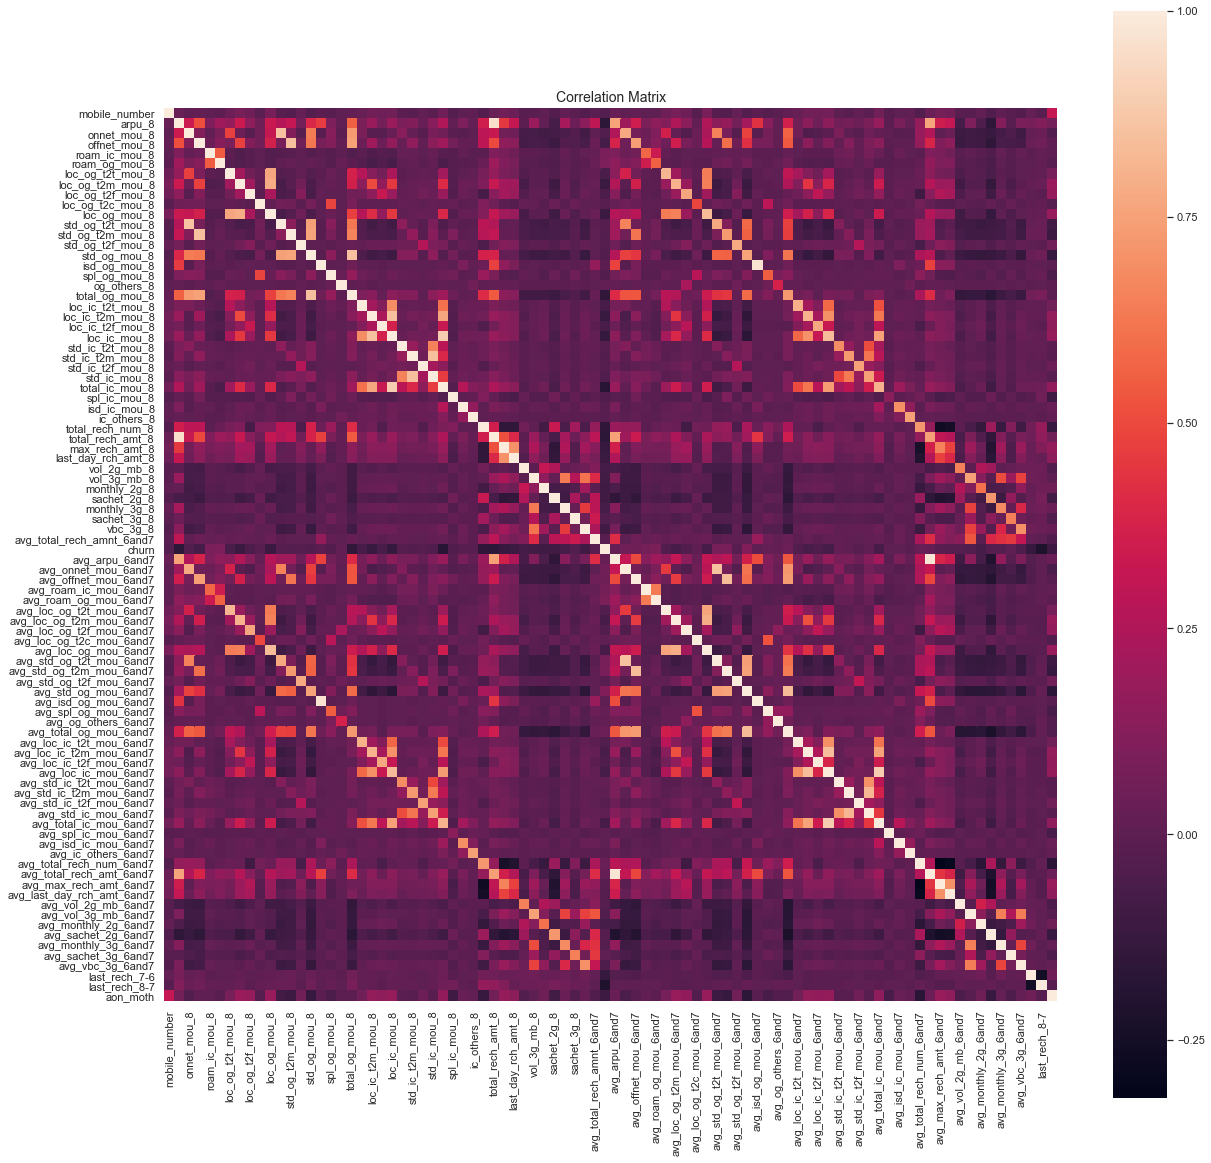

In [188]:
# Lets find Correlation among variables

plt.subplots(figsize=(20,20))

plt.title('Correlation Matrix', fontsize=14)
corr = telecomData_filtered.corr()
sns.heatmap(corr, square=True)

plt.show()

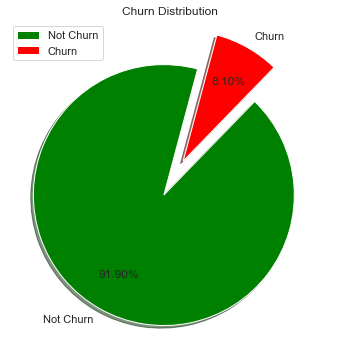

In [189]:
# Plot Pie Chart to see Churn Distribution

plt.figure(figsize=(20,6))

# First Subplot shows the count of "Defaulters, Non-Defaulters and In-Progress" in %.
plt.subplot(1,2,1)
labels1=['Not Churn','Churn']
colors1 = ['Green','Red']
explode1=[0.1,0.2]
plt.title('Churn Distribution')

telecomData_filtered['churn'].value_counts().plot.pie(autopct='%1.2f%%',startangle=75, colors=colors1, labels=labels1,
                                                      explode=explode1, pctdistance=.7, shadow=True)

plt.legend(labels1, loc='upper left')
plt.ylabel('')


plt.show()

In [190]:
telecomData_filtered.head(1)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,avg_total_rech_amnt_6and7,churn,avg_arpu_6and7,avg_onnet_mou_6and7,avg_offnet_mou_6and7,avg_roam_ic_mou_6and7,avg_roam_og_mou_6and7,avg_loc_og_t2t_mou_6and7,avg_loc_og_t2m_mou_6and7,avg_loc_og_t2f_mou_6and7,avg_loc_og_t2c_mou_6and7,avg_loc_og_mou_6and7,avg_std_og_t2t_mou_6and7,avg_std_og_t2m_mou_6and7,avg_std_og_t2f_mou_6and7,avg_std_og_mou_6and7,avg_isd_og_mou_6and7,avg_spl_og_mou_6and7,avg_og_others_6and7,avg_total_og_mou_6and7,avg_loc_ic_t2t_mou_6and7,avg_loc_ic_t2m_mou_6and7,avg_loc_ic_t2f_mou_6and7,avg_loc_ic_mou_6and7,avg_std_ic_t2t_mou_6and7,avg_std_ic_t2m_mou_6and7,avg_std_ic_t2f_mou_6and7,avg_std_ic_mou_6and7,avg_total_ic_mou_6and7,avg_spl_ic_mou_6and7,avg_isd_ic_mou_6and7,avg_ic_others_6and7,avg_total_rech_num_6and7,avg_total_rech_amt_6and7,avg_max_rech_amt_6and7,avg_last_day_rch_amt_6and7,avg_vol_2g_mb_6and7,avg_vol_3g_mb_6and7,avg_monthly_2g_6and7,avg_sachet_2g_6and7,avg_monthly_3g_6and7,avg_sachet_3g_6and7,avg_vbc_3g_6and7,last_rech_7-6,last_rech_8-7,aon_moth
0,7000842753,213.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,4.13,1.15,5.44,0.0,0.0,0.0,0.0,5.44,0.0,0.0,0.0,2,252,252,252,5.75,109.61,0,0,1,0,30.4,559.0,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.5,307.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.6,25,23,32.266667


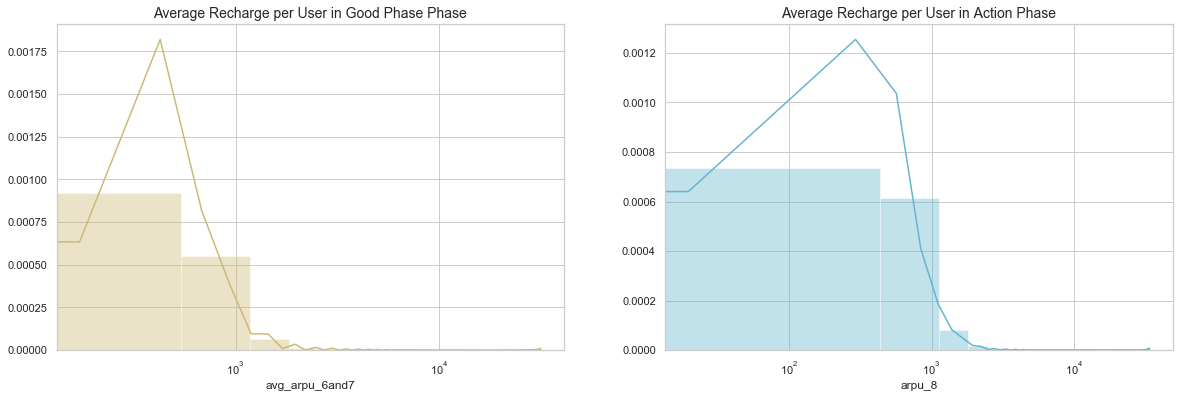

In [191]:
# Plotting a univariate distribution of observations for Amount Columns
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.title("Average Recharge per User in Good Phase Phase", fontsize=14)
sns.distplot(telecomData_filtered['avg_arpu_6and7'], color='y')
plt.xscale('log')

plt.subplot(1,2,2)
plt.title("Average Recharge per User in Action Phase", fontsize=14)
sns.distplot(telecomData_filtered['arpu_8'], color='c')
plt.xscale('log')

plt.show()

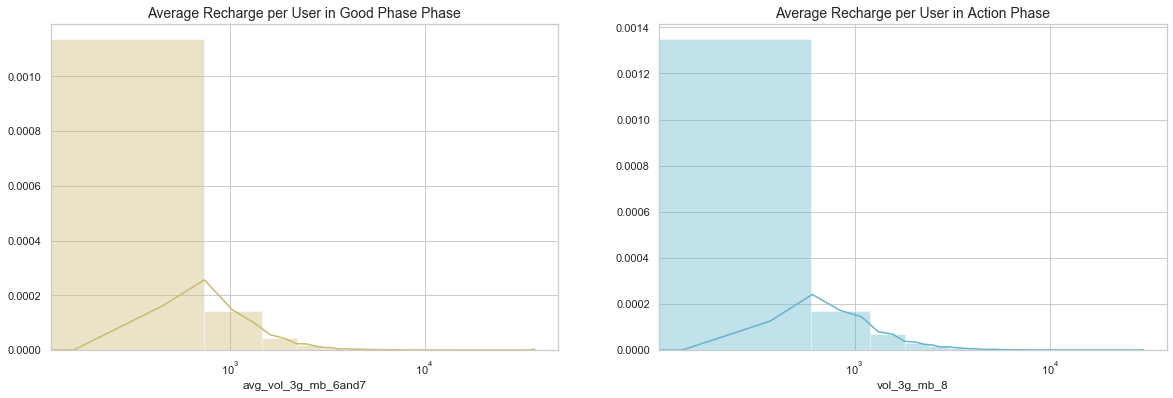

In [192]:
# Plotting a univariate distribution of observations for Amount Columns
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.title("Average Recharge per User in Good Phase Phase", fontsize=14)
sns.distplot(telecomData_filtered['avg_vol_3g_mb_6and7'], color='y')
plt.xscale('log')

plt.subplot(1,2,2)
plt.title("Average Recharge per User in Action Phase", fontsize=14)
sns.distplot(telecomData_filtered['vol_3g_mb_8'], color='c')
plt.xscale('log')

plt.show()

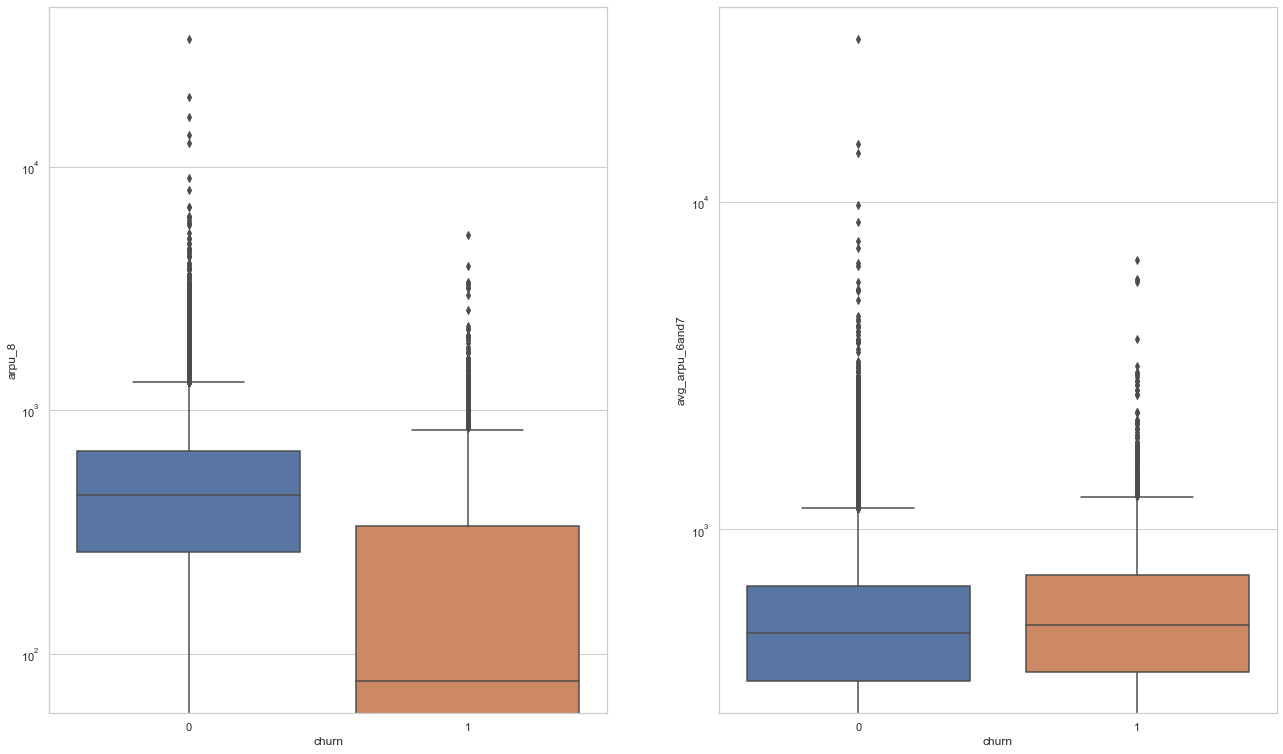

In [193]:
plt.figure(figsize=(22, 13))
plt.subplot(1,2,1)

sns.boxplot(data=telecomData_filtered, x="churn", y="arpu_8")
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(data=telecomData_filtered, x="churn", y="avg_arpu_6and7")
plt.yscale('log')

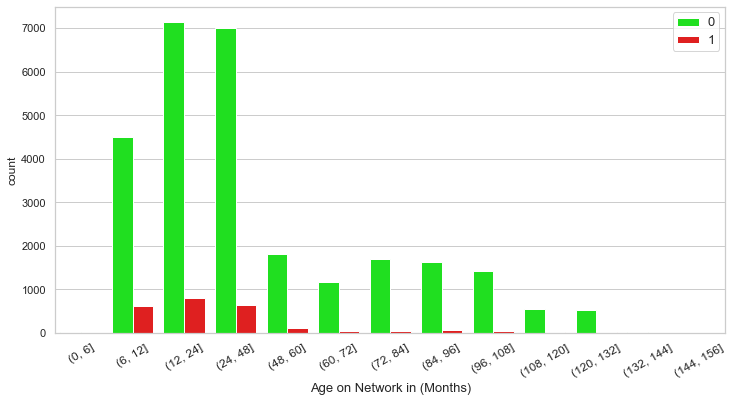

In [194]:
# Create bins for month.

telecomData_filtered['aon_moth_bracket'] = pd.cut(telecomData_filtered.aon_moth, [0,6,12,24,48,60,72,84,96,
                                                                                  108,120,132,144,156])

# Create Chart to see count of users churn in respective month bracket.
plt.figure(figsize=(12,6))

palette = ['#00FF00','#FF0000']
ax=sns.countplot(x='aon_moth_bracket', data=telecomData_filtered, hue='churn', palette=palette)
ax.legend(loc='upper right')
plt.setp(ax.get_legend().get_texts(), fontsize=13)
plt.xticks(rotation=30, fontsize=12)
plt.xlabel("Age on Network in (Months)", fontsize=13)
plt.show()

In [195]:
# Create copy of dataframe to for model building
df_telecomData = telecomData_filtered[:].copy()

In [196]:
df_telecomData.shape,telecomData_filtered.shape

((29928, 89), (29928, 89))

In [197]:
# Droping "aon_moth_bracket" column since its data type is Category and does not allow to impute 0.
# Also "aon_moth_bracket" is correlated to "aon_moth" variable.
df_telecomData = df_telecomData.drop(['aon_moth_bracket'], axis=1)

In [198]:
# Impute 0 to all values where it is NaN
df_telecomData.fillna(0, inplace=True)

##### Divide into X and Y sets for model building

In [199]:
y_telecom = df_telecomData.pop('churn')
X_telecom = df_telecomData

In [200]:
X_telecom.shape, y_telecom.shape

((29928, 87), (29928,))

##### Rescaling Features

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_telecom)
X_telecom = scaler.transform(X_telecom)

##### Test Train Split

In [202]:
# Split data into training and test data
from sklearn.model_selection import train_test_split

# Random state is selected so that result does not vary for each execution.
X_train, X_test, y_train, y_test = train_test_split(X_telecom, y_telecom, test_size=0.3, train_size=0.7, random_state=11, stratify=y_telecom)

In [203]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20949, 87) (8979, 87) (20949,) (8979,)


##### Apply SMOTE (Synthetic Minority Over-sampling Technique) to Balance Data set

In [204]:
from imblearn.over_sampling import SMOTE
smte = SMOTE(kind = "regular")
X_smt,y_smt = smte.fit_sample(X_train,y_train)
print(X_smt.shape,y_smt.shape)

(38504, 87) (38504,)


## PCA

In [205]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=11)

pca.fit(X_smt)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [206]:
X_train_pca = pca.fit_transform(X_smt)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38504, 87)
(8979, 87)


##### Applying Logistic Regression to the Transformed Data

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegr_pca  = LogisticRegression()
logisticRegr_model_pca = logisticRegr_pca.fit(X_train_pca,y_smt)

##### Model Prediction

In [208]:
prob = logisticRegr_model_pca.predict_proba(X_test_pca)
prob = prob[:, 1]

In [209]:
auc = metrics.roc_auc_score(y_test, prob)
print("Logistic Regression AUC with PCA: "'%.2f' % auc)

Logistic Regression AUC with PCA: 0.90


In [210]:
y_pred = logisticRegr_model_pca.predict(X_test_pca)
print("Logistic Regression accuracy with PCA: "'%.2f' %metrics.accuracy_score(y_test,y_pred))
print("Logistic Regression recall with PCA: "'%.2f' %metrics.recall_score(y_test,y_pred))

Logistic Regression accuracy with PCA: 0.84
Logistic Regression recall with PCA: 0.85


##### Plot Area under ROC Curve

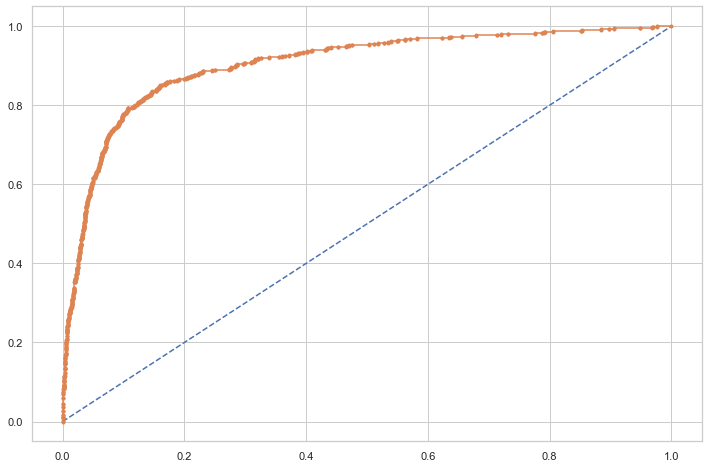

In [211]:
plt.figure(figsize=(12,8))
pst, ped, lt = metrics.roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(pst, ped, marker='.')
plt.show()

In [212]:
print("Logistic Regression accuracy with PCA: "'%.2f' % logisticRegr_model_pca.score(X_test_pca, y_test))

Logistic Regression accuracy with PCA: 0.84


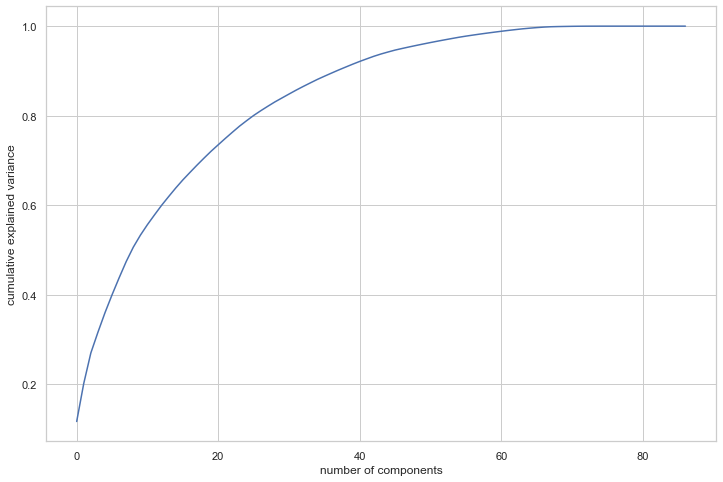

In [213]:
# screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [214]:
# For variance approx. 98%
pca_60 = PCA(n_components=60)

X_train_pca_60 = pca_60.fit_transform(X_smt)
print(X_train_pca_60.shape)

X_test_pca_60 = pca_60.transform(X_test)
print(X_test_pca_60.shape)

(38504, 60)
(8979, 60)


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegr_pca  = LogisticRegression()
logisticRegr_model_pca = logisticRegr_pca.fit(X_train_pca_60,y_smt)

In [216]:
y_pred = logisticRegr_model_pca.predict(X_test_pca_60)

In [217]:
print("Logistic Regression accuracy with PCA: "'%.2f' % logisticRegr_model_pca.score(X_test_pca_60, y_test))

Logistic Regression accuracy with PCA: 0.83


In [218]:
print("Logistic Regression recall with PCA: "'%.2f' % metrics.recall_score(y_test, y_pred))

Logistic Regression recall with PCA: 0.85


In [219]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8252
           1       0.31      0.85      0.45       727

    accuracy                           0.83      8979
   macro avg       0.65      0.84      0.68      8979
weighted avg       0.93      0.83      0.86      8979



##### For 90 % variance (40 variables) accuracy is .82
##### For 98 % variance (60 variables) accuracy is .83

## Support Vecor Machine (SVM)

In [220]:
from sklearn.svm import SVC

logisticRegr = LogisticRegression()

logisticRegr.svm = SVC(kernel='linear',random_state=11) 

logisticRegr.svm.fit(X_train_pca, y_smt)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=11,
    shrinking=True, tol=0.001, verbose=False)

In [221]:
pred = logisticRegr.svm.predict(X_test_pca)
print("Accuracy score for SVM with PCA and linear kernel: "'%.2f' %metrics.accuracy_score(y_test, pred))

0.8410736162156142

In [222]:
print("Recall score for SVM with PCA and linear kernel: "'%.2f' %metrics.recall_score(y_test, pred))

0.8404401650618982

In [223]:
logisticRegr_rbf = LogisticRegression()

logisticRegr_rbf.svm = SVC(kernel='rbf',random_state=11) 

logisticRegr_rbf.svm.fit(X_train_pca, y_smt)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=11,
    shrinking=True, tol=0.001, verbose=False)

In [224]:
pred = logisticRegr_rbf.svm.predict(X_test_pca)
print("Recall score for SVM with PCA and rbf kernel: "'%.2f' %metrics.accuracy_score(y_test, pred))

0.8843969261610425

In [225]:
print("Recall score for SVM with PCA and rbf kernel: "'%.2f' %metrics.recall_score(y_test, pred))

0.7840440165061898

In [226]:
from sklearn.tree import DecisionTreeClassifier
# Decision tree with PCA
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca,y_smt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [227]:
y_pred = decision_tree.predict(X_test_pca).astype(int)
acc_decision_tree = decision_tree.score(X_test_pca,y_test) 
print(acc_decision_tree)

0.8518766009577904


In [228]:
print("Recall score for decision tree with PCA and default parameters: "'%.2f' %metrics.recall_score(y_test, y_pred))
print("Accuracy score for decision tree with PCA and default parameters: " '%.2f' %metrics.accuracy_score(y_test, y_pred))

0.5488308115543329
0.8518766009577904


#### Considering the business case we need to correctly identify the churn customers hence the sensitivity/recall should be the parameter we need to consider while selecting a model.When the different models are compared nearly all the models have similar accuracy. SVM and logistic regression with PCA give comparable recall scores .However we opt for logistic regression as SVM is heavy on CPU.####


## Deciding on Model to explain business case ##

## Decision Tree

In [229]:
# Import Required packages
from sklearn.tree import DecisionTreeClassifier

# Decision tree with default hyperparameters (Except max_depth)
DecisionTree_D = DecisionTreeClassifier(max_depth=3)
DecisionTree_D.fit(X_smt, y_smt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [230]:
# Default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test)
y_pred_dt = DecisionTree_D.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8252
           1       0.33      0.79      0.47       727

    accuracy                           0.85      8979
   macro avg       0.65      0.83      0.69      8979
weighted avg       0.93      0.85      0.88      8979



In [231]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred_dt))

[[7078 1174]
 [ 151  576]]
Accuracy of Decision Tree : 0.8524334558414077


##### Find Optimal Hyperparameters

In [232]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3, 15, 3),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds)

# Fit the grid search to the data
grid_search.fit(X_smt,y_smt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 15, 3),
                      

In [233]:
# Optimal accuracy score
print("best accuracy", grid_search.best_score_)

best accuracy 0.8981664242676085


In [234]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


##### With Optimal Parameters

In [235]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 11,
                                  max_depth=12, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_smt,y_smt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [236]:
# accuracy score
clf_gini.score(X_smt,y_smt)

0.9171514647828797

In [237]:
X_test = pd.DataFrame(data=X_test)
y_pred_dt = clf_gini.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8252
           1       0.41      0.78      0.54       727

    accuracy                           0.89      8979
   macro avg       0.69      0.84      0.74      8979
weighted avg       0.93      0.89      0.91      8979



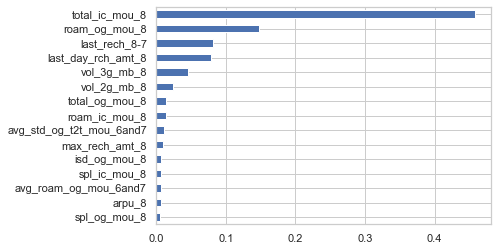

In [238]:
# Feature Importance
importances = clf_gini.feature_importances_
weights = pd.Series(importances,
                 index=df_telecomData.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')
plt.show()

## Random Forest

In [239]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Random forest with default parameters.
rfc = RandomForestClassifier()

In [240]:
# fit data to model.
rfc.fit(X_smt,y_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [241]:
pred = rfc.predict(X_test)

In [242]:
# Let's check the report of our default model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8252
           1       0.57      0.64      0.60       727

    accuracy                           0.93      8979
   macro avg       0.77      0.80      0.78      8979
weighted avg       0.94      0.93      0.93      8979



In [243]:
print(accuracy_score(y_test,pred))

0.9312841073616216


##### Tuning max_depth

In [244]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
rf.fit(X_smt,y_smt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [245]:
# scores of GridSearch CV
scores = rf.cv_results_

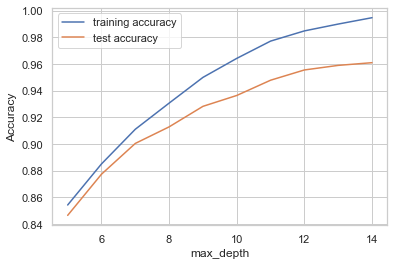

In [246]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##### Tuning n_estimators

In [247]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10,100, 10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="recall",
                    return_train_score=True)
rf.fit(X_smt,y_smt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [248]:
# scores of GridSearch CV
scores = rf.cv_results_

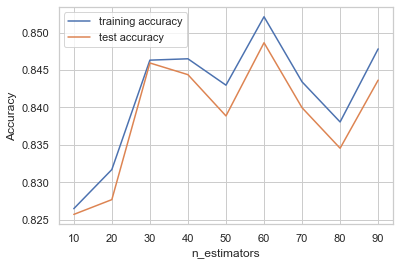

In [249]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Tuning max_features

In [250]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 45]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                    return_train_score=True)
rf.fit(X_smt,y_smt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [251]:
# scores of GridSearch CV
scores = rf.cv_results_

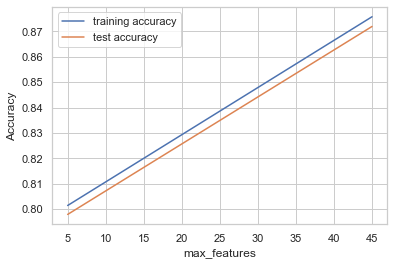

In [252]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Tuning min_samples_leaf

In [253]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
rf.fit(X_smt,y_smt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [254]:
# scores of GridSearch CV
scores = rf.cv_results_

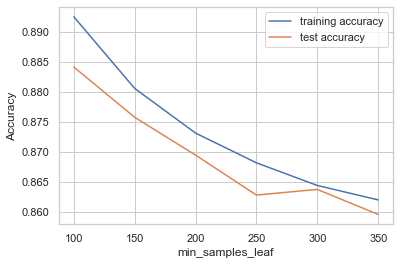

In [255]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Tuning min_samples_split

In [256]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                    return_train_score=True)
rf.fit(X_smt,y_smt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [257]:
# scores of GridSearch CV
scores = rf.cv_results_

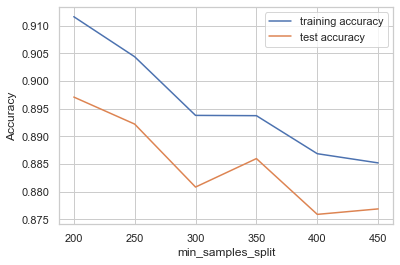

In [258]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### With Optimal Parameters

In [259]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=35,
                             n_estimators=30)

In [260]:
# Model fit
rfc.fit(X_smt,y_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [261]:
# predict
pred = rfc.predict(X_test)

In [262]:
print(metrics.accuracy_score(y_test,pred))
print(metrics.recall_score(y_test,pred))

0.9053346697850541
0.7744154057771664


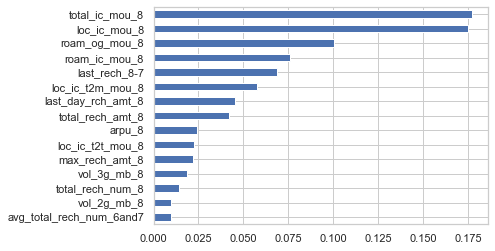

In [263]:
# Feature Importance
importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=df_telecomData.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')
plt.show()

## Logistic Regression ##

In [264]:
X_smt_df = pd.DataFrame(data=X_smt, columns=df_telecomData.columns)
X_test_df = pd.DataFrame(data=X_test, columns=df_telecomData.columns)

In [265]:
#Checking for correlated columns where correlation is greater than 0.6
# Create correlation matrix
corr_matrix = telecomData_filtered.filter(like='8').corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [266]:
to_drop

['loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'monthly_3g_8',
 'vbc_3g_8']

In [267]:
cor = X_smt_df[to_drop].corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

total_rech_amt_8  total_og_mou_8      0.636682
total_og_mou_8    std_og_t2t_mou_8    0.655514
                  std_og_t2m_mou_8    0.672036
std_og_mou_8      std_og_t2m_mou_8    0.757889
                  std_og_t2t_mou_8    0.759022
total_og_mou_8    std_og_mou_8        0.875752
total_ic_mou_8    loc_ic_mou_8        0.906338
dtype: float64

In [268]:
# Drop correlated components from _8 month and 6and7 month
X_smt_df.drop(columns=['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8','loc_ic_mou_8', 'avg_std_og_t2t_mou_6and7', 'avg_std_og_t2m_mou_6and7', 'avg_std_og_mou_6and7','avg_loc_ic_mou_6and7' ], inplace=True)

In [269]:
# RFE on the dataset #
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_smt_df,y_smt)


In [270]:
col = list(X_smt_df.columns[rfe.support_])

In [271]:
col

['onnet_mou_8',
 'offnet_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2m_mou_8',
 'total_ic_mou_8',
 'total_rech_num_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'avg_onnet_mou_6and7',
 'avg_offnet_mou_6and7',
 'avg_roam_og_mou_6and7',
 'avg_total_og_mou_6and7',
 'avg_loc_ic_t2t_mou_6and7',
 'avg_loc_ic_t2m_mou_6and7',
 'avg_loc_ic_t2f_mou_6and7',
 'avg_std_ic_mou_6and7',
 'avg_total_ic_mou_6and7',
 'avg_isd_ic_mou_6and7',
 'avg_ic_others_6and7']

In [272]:
X_smt_rfe = X_smt_df[col]

In [273]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_smt_rfe, y_smt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
X_test_rfe = X_test_df[col]
X_test_rfe.fillna(0, inplace=True)
y_pred = lr.predict(X_test_rfe)

In [276]:
#printing confusion metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8252    0]
 [ 727    0]]


In [277]:
#print accuracy score
lr.score(X_test_rfe, y_test)

0.9190332999220403

In [278]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8252
           1       0.00      0.00      0.00       727

    accuracy                           0.92      8979
   macro avg       0.46      0.50      0.48      8979
weighted avg       0.84      0.92      0.88      8979



In [279]:
#Check variance_inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_smt_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_smt_rfe.values, i) for i in range(X_smt_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,avg_total_ic_mou_6and7,151.59
12,avg_total_og_mou_6and7,68.91
14,avg_loc_ic_t2m_mou_6and7,55.28
10,avg_offnet_mou_6and7,36.48
9,avg_onnet_mou_6and7,32.49
13,avg_loc_ic_t2t_mou_6and7,25.49
16,avg_std_ic_mou_6and7,24.08
18,avg_isd_ic_mou_6and7,6.81
4,total_ic_mou_8,6.58
3,loc_ic_t2m_mou_8,6.10


In [280]:
# drop highly correlated columns
X_smt_rfe2 = X_smt_rfe.drop(columns=['avg_total_ic_mou_6and7'])
X_test_df = pd.DataFrame(data=X_test_rfe, columns=X_smt_rfe.columns)
X_test_rfe2 = X_test_df.drop(columns=['avg_total_ic_mou_6and7'])

In [281]:
lr2 = LogisticRegression(random_state=1)
lr2.fit(X_smt_rfe2, y_smt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [282]:
#X_test_rfe2.fillna(0, inplace=True)
lr2.score(X_test_rfe2, y_test)

0.9190332999220403

In [283]:
y_pred = lr2.predict(X_test_rfe2)

In [284]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8252
           1       0.00      0.00      0.00       727

    accuracy                           0.92      8979
   macro avg       0.46      0.50      0.48      8979
weighted avg       0.84      0.92      0.88      8979



In [285]:
vif = pd.DataFrame()
vif['Features'] = X_smt_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_smt_rfe2.values, i) for i in range(X_smt_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,avg_total_og_mou_6and7,39.71
10,avg_offnet_mou_6and7,21.22
9,avg_onnet_mou_6and7,19.02
4,total_ic_mou_8,6.58
3,loc_ic_t2m_mou_8,6.09
14,avg_loc_ic_t2m_mou_6and7,2.55
11,avg_roam_og_mou_6and7,2.52
1,offnet_mou_8,2.43
0,onnet_mou_8,2.27
2,loc_og_mou_8,1.94


In [286]:
# drop highly correlated columns
X_smt_rfe3 = X_smt_rfe2.drop(columns=['avg_total_og_mou_6and7'])
X_test_rfe3 = X_test_rfe2.drop(columns=['avg_total_og_mou_6and7'])

In [287]:
lr3 = LogisticRegression(random_state=1)
lr3.fit(X_smt_rfe3, y_smt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
lr3.score(X_test_rfe3, y_test)

0.9190332999220403

In [289]:
y_pred = lr3.predict(X_test_rfe3)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8252
           1       0.00      0.00      0.00       727

    accuracy                           0.92      8979
   macro avg       0.46      0.50      0.48      8979
weighted avg       0.84      0.92      0.88      8979



In [290]:
vif = pd.DataFrame()
vif['Features'] = X_smt_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_smt_rfe3.values, i) for i in range(X_smt_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_8,6.58
3,loc_ic_t2m_mou_8,6.09
13,avg_loc_ic_t2m_mou_6and7,2.55
1,offnet_mou_8,2.43
0,onnet_mou_8,2.26
2,loc_og_mou_8,1.94
9,avg_onnet_mou_6and7,1.87
5,total_rech_num_8,1.85
10,avg_offnet_mou_6and7,1.80
12,avg_loc_ic_t2t_mou_6and7,1.72


In [291]:
# drop highly correlated columns
X_smt_rfe4 = X_smt_rfe3.drop(columns=['loc_ic_t2m_mou_8'])
X_test_rfe4 = X_test_rfe3.drop(columns=['loc_ic_t2m_mou_8'])

In [292]:
lr4 = LogisticRegression(random_state=1)
lr4.fit(X_smt_rfe4, y_smt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [293]:
lr4.score(X_test_rfe4, y_test)

0.9190332999220403

In [294]:
y_pred = lr4.predict(X_test_rfe4)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8252
           1       0.00      0.00      0.00       727

    accuracy                           0.92      8979
   macro avg       0.46      0.50      0.48      8979
weighted avg       0.84      0.92      0.88      8979



In [295]:
vif = pd.DataFrame()
vif['Features'] = X_smt_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_smt_rfe4.values, i) for i in range(X_smt_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_8,2.24
1,offnet_mou_8,2.42
2,loc_og_mou_8,1.91
3,total_ic_mou_8,3.12
4,total_rech_num_8,1.85
5,monthly_2g_8,1.06
6,sachet_2g_8,1.30
7,monthly_3g_8,1.06
8,avg_onnet_mou_6and7,1.87
9,avg_offnet_mou_6and7,1.79


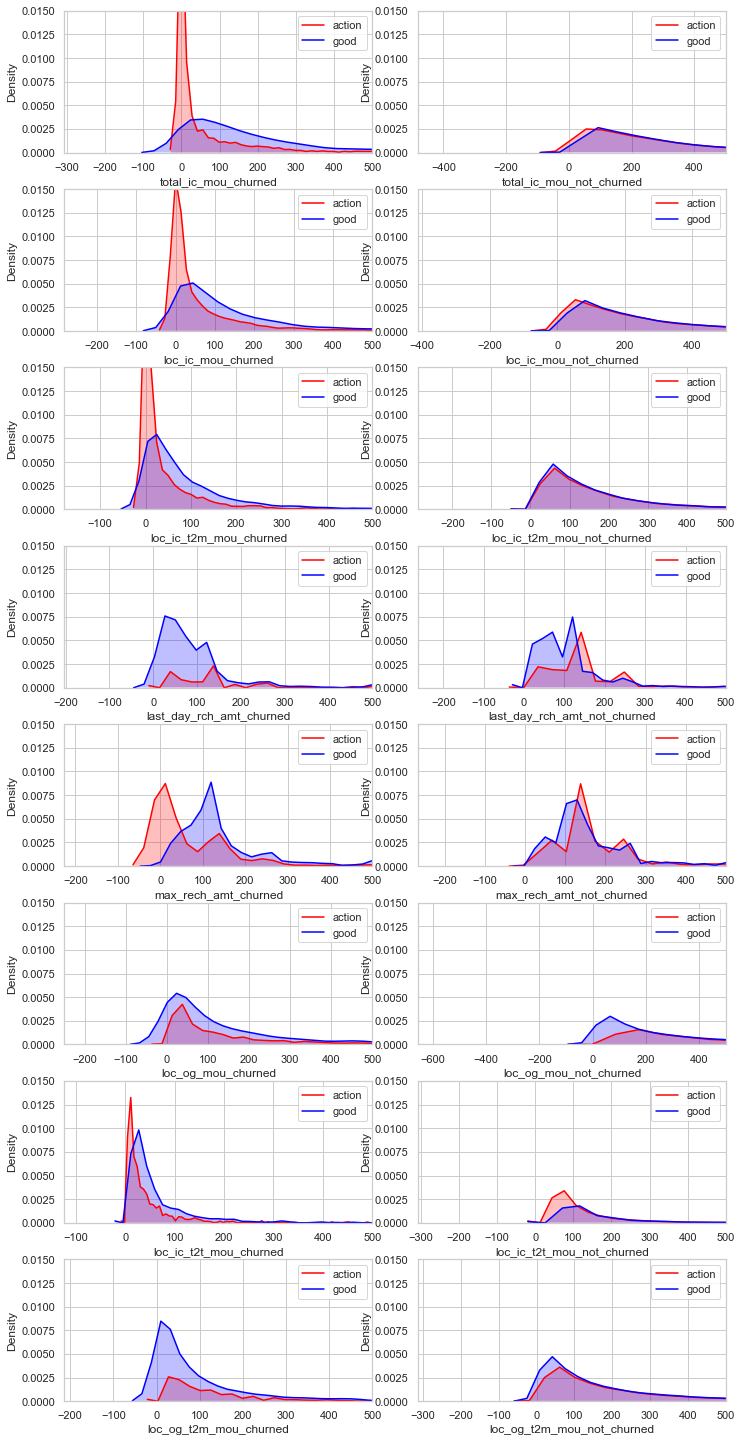

In [296]:
#weights.sort_values()[-15:].index
feature_list_1 = ['total_ic_mou_8', 'loc_ic_mou_8', 'loc_ic_t2m_mou_8', 'last_day_rch_amt_8',
'max_rech_amt_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8']
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10,20))
fig.tight_layout()
num = 0
for col in feature_list_1:
    ax=axes[num,0]
    sns.kdeplot(telecomData_filtered[col][(telecomData_filtered["churn"] == 1)],
                ax = ax, color="Red", shade = True)
    sns.kdeplot(telecomData_filtered["avg_"+col.rstrip("8")+"6and7"][(telecomData_filtered["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
    ax.legend(["action","good"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(col.rstrip("8")+"churned")
    ax.set_xlim(right=500)
    ax.set_ylim(top=0.015)
    
    ax1=axes[num,1]
    sns.kdeplot(telecomData_filtered[col][(telecomData_filtered["churn"] == 0)],
                ax= ax1, color="Red", shade = True)
    sns.kdeplot(telecomData_filtered["avg_"+col.rstrip("8")+"6and7"][(telecomData_filtered["churn"] == 0)],
                ax =ax1, color="Blue", shade= True)
    ax1.legend(["action","good"],loc='upper right')
    ax1.set_ylabel('Density')
    ax1.set_xlabel(col.rstrip("8")+"not_churned")
    ax1.set_xlim(right=500)
    ax1.set_ylim(top=0.015)
    num=num+1
plt.show()

### Key Takeaways ###
#### Dip in the number of incoming calls during the 'action' phase when compared to 'good' phase is a strong indicator for churn
#### Also customers who ic_mou is less than 100 are more likely to churn
#### Max_rech_amt also shows a shift in peak for customers who are likely to churn.Churn customers go for less recharge amounts.

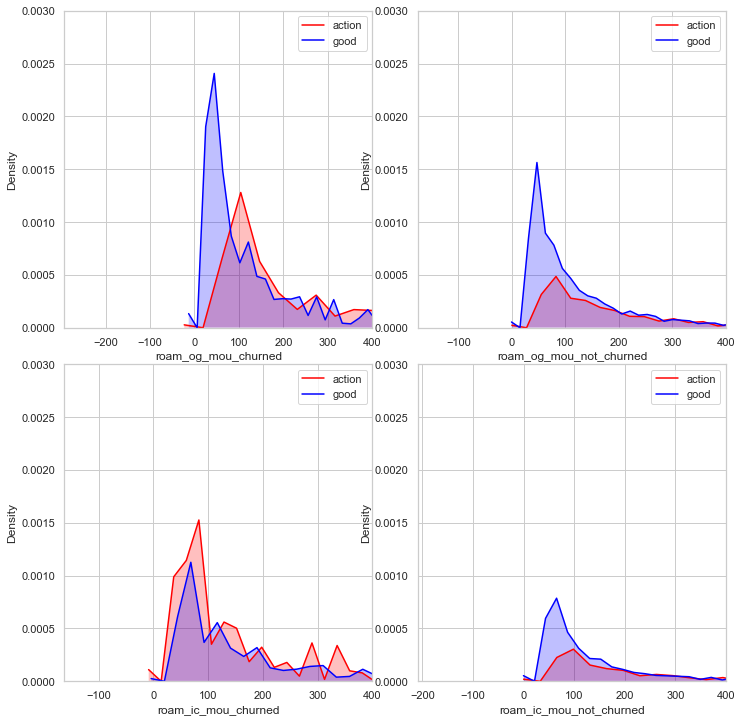

In [297]:
feature_list_2 = ['roam_og_mou_8', 'roam_ic_mou_8']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.tight_layout()
num = 0
for col in feature_list_2:
    ax=axes[num,0]
    sns.kdeplot(telecomData_filtered[col][(telecomData_filtered["churn"] == 1)],
                ax = ax, color="Red", shade = True)
    sns.kdeplot(telecomData_filtered["avg_"+col.rstrip("8")+"6and7"][(telecomData_filtered["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
    ax.legend(["action","good"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(col.rstrip("8")+"churned")
    ax.set_xlim(right=400)
    ax.set_ylim(top=0.003)
    
    ax1=axes[num,1]
    sns.kdeplot(telecomData_filtered[col][(telecomData_filtered["churn"] == 0)],
                ax= ax1, color="Red", shade = True)
    sns.kdeplot(telecomData_filtered["avg_"+col.rstrip("8")+"6and7"][(telecomData_filtered["churn"] == 0)],
                ax =ax1, color="Blue", shade= True)
    ax1.legend(["action","good"],loc='upper right')
    ax1.set_ylabel('Density')
    ax1.set_xlabel(col.rstrip("8")+"not_churned")
    ax1.set_xlim(right=400)
    ax1.set_ylim(top=0.003)
    num=num+1
plt.show()

#### Probable churn customers demonstrate an increase in roaming mou(minutes of usage) ####

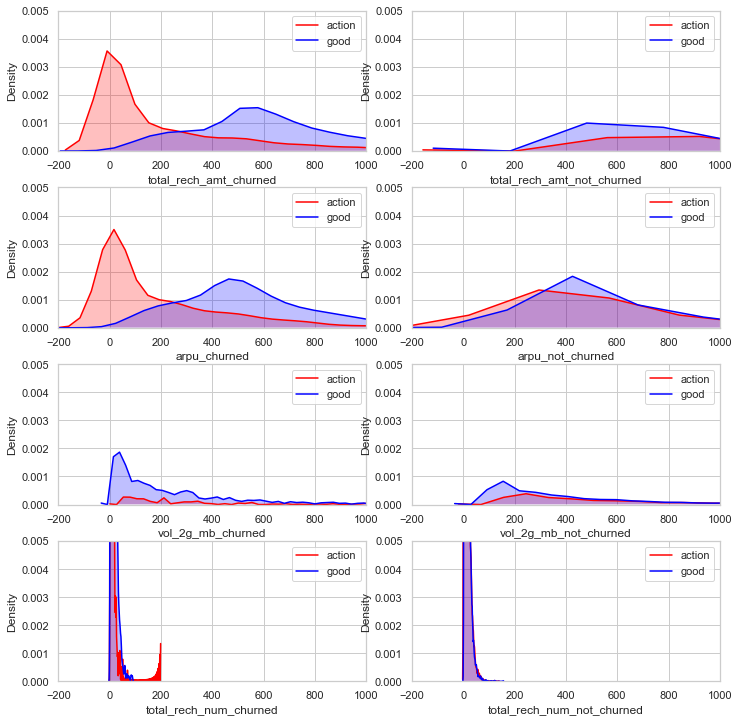

In [298]:
feature_list_3=['total_rech_amt_8', 'arpu_8', 'vol_2g_mb_8', 'total_rech_num_8']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
fig.tight_layout()
num = 0
for col in feature_list_3:
    ax=axes[num,0]
    sns.kdeplot(telecomData_filtered[col][(telecomData_filtered["churn"] == 1)],
                ax = ax, color="Red", shade = True)
    sns.kdeplot(telecomData_filtered["avg_"+col.rstrip("8")+"6and7"][(telecomData_filtered["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
    ax.legend(["action","good"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(col.rstrip("8")+"churned")
    ax.set_xlim(left=-200, right=1000)
    ax.set_ylim(top=0.005)
    
    ax1=axes[num,1]
    sns.kdeplot(telecomData_filtered[col][(telecomData_filtered["churn"] == 0)],
                ax= ax1, color="Red", shade = True)
    sns.kdeplot(telecomData_filtered["avg_"+col.rstrip("8")+"6and7"][(telecomData_filtered["churn"] == 0)],
                ax =ax1, color="Blue", shade= True)
    ax1.legend(["action","good"],loc='upper right')
    ax1.set_ylabel('Density')
    ax1.set_xlabel(col.rstrip("8")+"not_churned")
    ax1.set_xlim(left= -200, right=1000)
    ax1.set_ylim(top=0.005)
    num=num+1
plt.show()

#### avg revenue per user shows a decrease for customers who have churned. This being closely related to total_recharge_amount for prepaid customers, also evident from the density plots above ####